In [ ]:
import pandas as pd
import numpy as np
df=pd.read_csv("/content/smartwatches.csv")
df.head()
df.shape
df=df.iloc[:,1:]
df

,Brand,Current Price,Original Price,Discount Percentage,Rating,Number OF Ratings,Model Name,Dial Shape,Strap Color,Strap Material,Touchscreen,Battery Life (Days),Bluetooth,Display Size,Weight
0,noise,82990.0,89900.0,7.686318,4.0,65.0,Wrb-sw-colorfitpro4alpha-std-rgld_pnk,NaN,NaN,NaN,NaN,8.0,Yes,NaN,35 - 50 g
1,fire-boltt,3799.0,16999.0,77.651627,4.3,20788.0,BSW046,NaN,NaN,Silicon,Yes,3.5,Yes,1.8 inches,50 - 75 g
2,boat,1999.0,7990.0,74.981227,3.8,21724.0,Wave Call,NaN,NaN,Silicon,Yes,8.0,Yes,1.7 inches,35 - 50 g
3,fire-boltt,1799.0,19999.0,91.004550,4.3,13244.0,BSW053,NaN,NaN,Silicon,Yes,3.5,Yes,1.8 inches,75g +
4,noise,1599.0,4999.0,68.013603,4.1,13901.0,Wrb-sw-colorfitpulsegobuzz-std-blk_blk,NaN,NaN,Other,Yes,8.0,Yes,1.7 inches,35 - 50 g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,fire-boltt,5999.0,8999.0,33.337037,2.5,NaN,bsw003,Circle,Grey,Silicon,Yes,22.0,Yes,1.3 inches,NaN
446,fire-boltt,3700.0,9999.0,62.996300,NaN,NaN,beast pro,Square,Black,Silicon,Yes,8.0,Yes,0.1 inches,NaN
447,fire-boltt,5999.0,8999.0,33.337037,2.5,NaN,bsw003,Circle,Gold,Silicon,Yes,22.0,Yes,1.3 inches,NaN
448,fire-boltt,3200.0,7999.0,59.994999,NaN,NaN,call 2,Square,Blue,Silicon,Yes,22.0,Yes,0.1 inches,NaN


In [ ]:
train_df=df.sample(frac=0.8,random_state=25)
train_df=train_df.reset_index()
train_df.info()
test_df=df.drop(train_df.index)
test_df=test_df.reset_index()
train_df.shape,test_df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   index                360 non-null    int64  
 1   Brand                360 non-null    object 
 2   Current Price        351 non-null    float64
 3   Original Price       309 non-null    float64
 4   Discount Percentage  309 non-null    float64
 5   Rating               355 non-null    float64
 6   Number OF Ratings    312 non-null    float64
 7   Model Name           335 non-null    object 
 8   Dial Shape           257 non-null    object 
 9   Strap Color          257 non-null    object 
 10  Strap Material       304 non-null    object 
 11  Touchscreen          332 non-null    object 
 12  Battery Life (Days)  336 non-null    float64
 13  Bluetooth            355 non-null    object 
 14  Display Size         335 non-null    object 
 15  Weight               218 non-null    obj

((360, 16), (90, 16))

In [ ]:
train_df.info()
train_df.isna().sum()
#remove null values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   index                360 non-null    int64  
 1   Brand                360 non-null    object 
 2   Current Price        351 non-null    float64
 3   Original Price       309 non-null    float64
 4   Discount Percentage  309 non-null    float64
 5   Rating               355 non-null    float64
 6   Number OF Ratings    312 non-null    float64
 7   Model Name           335 non-null    object 
 8   Dial Shape           257 non-null    object 
 9   Strap Color          257 non-null    object 
 10  Strap Material       304 non-null    object 
 11  Touchscreen          332 non-null    object 
 12  Battery Life (Days)  336 non-null    float64
 13  Bluetooth            355 non-null    object 
 14  Display Size         335 non-null    object 
 15  Weight               218 non-null    obj

,0
index,0
Brand,0
Current Price,9
Original Price,51
Discount Percentage,51
Rating,5
Number OF Ratings,48
Model Name,25
Dial Shape,103
Strap Color,103


In [ ]:
numerical_data = [feature for feature in train_df.columns if train_df[feature].dtypes != "object"]
numerical_data

['index',
 'Current Price',
 'Original Price',
 'Discount Percentage',
 'Rating',
 'Number OF Ratings',
 'Battery Life (Days)']

In [ ]:
continuous_data = [feature for feature in train_df.columns if train_df[feature].dtypes == "object"]
continuous_data

['Brand',
 'Model Name',
 'Dial Shape',
 'Strap Color',
 'Strap Material',
 'Touchscreen',
 'Bluetooth',
 'Display Size',
 'Weight']

In [ ]:
train_df[numerical_data].describe()

,index,Current Price,Original Price,Discount Percentage,Rating,Number OF Ratings,Battery Life (Days)
count,360.000000,351.000000,309.000000,309.000000,355.000000,312.000000,336.000000
mean,223.616667,11448.962963,14142.000000,48.497977,4.016901,10737.500000,13.751488
std,131.042330,15822.360020,15319.674146,23.991455,0.531012,27825.046583,7.746867
min,0.000000,1199.000000,1669.000000,-79.688436,2.000000,1.000000,0.750000
25%,107.750000,1999.000000,5999.000000,33.338890,3.800000,69.750000,8.000000
50%,223.500000,3799.000000,7999.000000,54.550414,4.100000,752.000000,12.500000
75%,338.250000,16495.000000,16495.000000,66.677780,4.300000,7631.250000,22.000000
max,449.000000,89900.000000,96390.000000,91.004550,5.000000,275607.000000,22.000000


In [ ]:
#mark in discount -79 and 91 check the data u collected

In [ ]:
train_df[numerical_data].corr()

,index,Current Price,Original Price,Discount Percentage,Rating,Number OF Ratings,Battery Life (Days)
index,1.000000,-0.078388,-0.052313,-0.112955,-0.243531,-0.181702,0.377067
Current Price,-0.078388,1.000000,0.974044,-0.617040,0.366655,-0.198970,-0.009636
Original Price,-0.052313,0.974044,1.000000,-0.500359,0.309463,-0.183854,-0.150590
Discount Percentage,-0.112955,-0.617040,-0.500359,1.000000,-0.209850,0.247423,0.014318
Rating,-0.243531,0.366655,0.309463,-0.209850,1.000000,0.091600,-0.075450
Number OF Ratings,-0.181702,-0.198970,-0.183854,0.247423,0.091600,1.000000,0.003819
Battery Life (Days),0.377067,-0.009636,-0.150590,0.014318,-0.075450,0.003819,1.000000


In [ ]:
train_df[numerical_data].skew()

,0
index,-0.016038
Current Price,2.433186
Original Price,2.843165
Discount Percentage,-0.996612
Rating,-1.386875
Number OF Ratings,5.491537
Battery Life (Days),-0.097526


In [ ]:
numerical_data.remove("index")
numerical_data

['Current Price',
 'Original Price',
 'Discount Percentage',
 'Rating',
 'Number OF Ratings',
 'Battery Life (Days)']

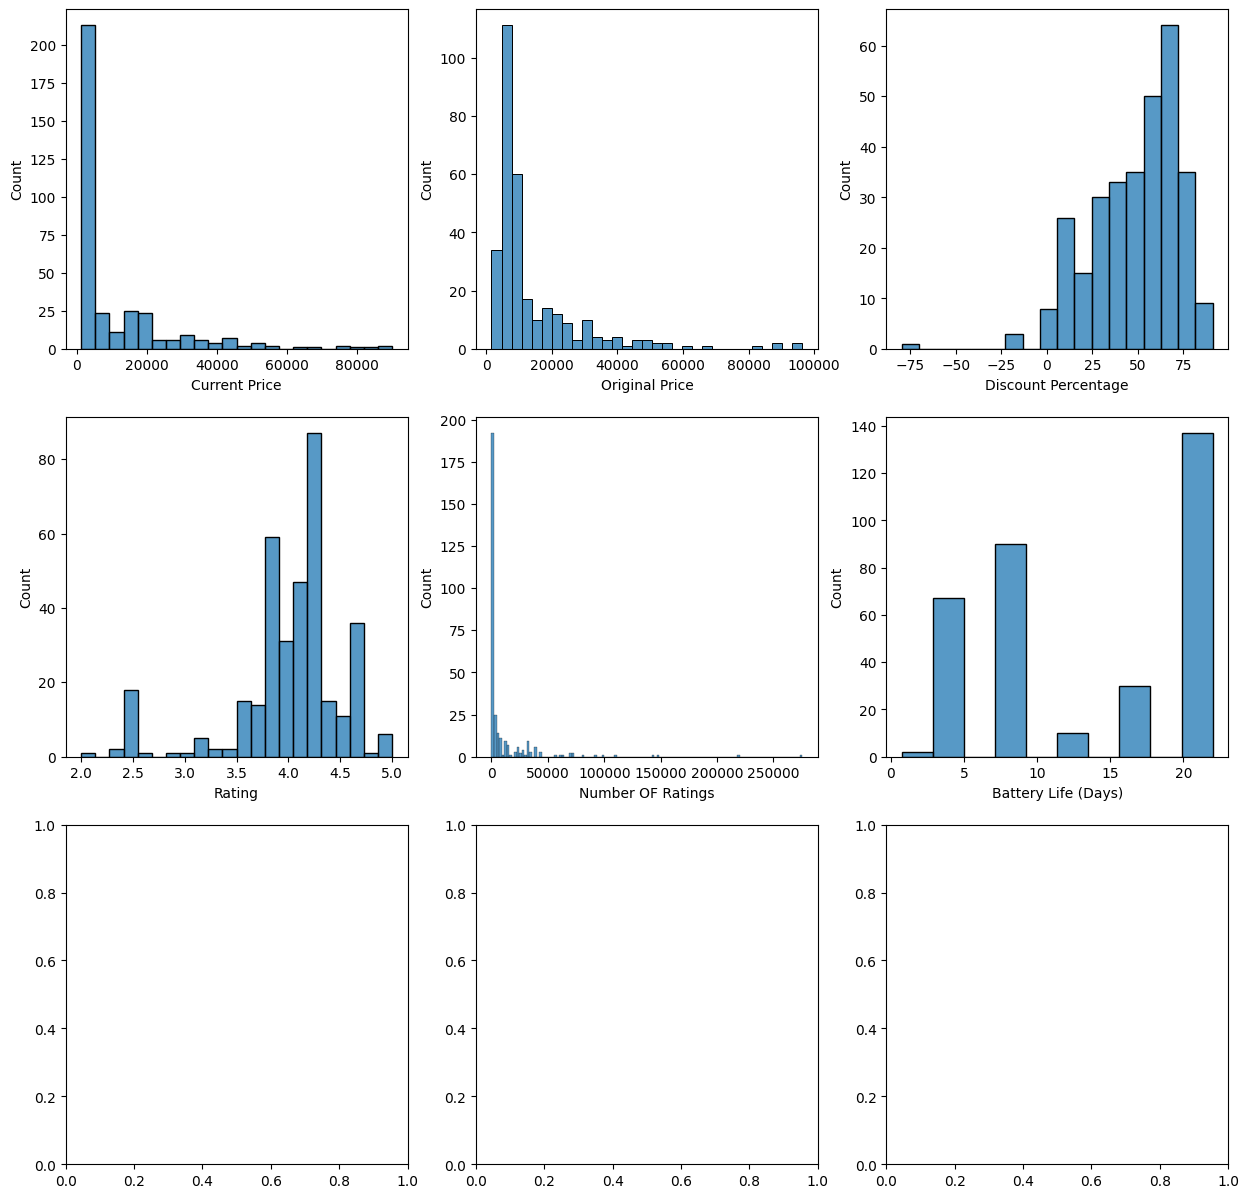

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, axex=plt.subplots(nrows=3,ncols=3,figsize=(15,15))
for i, columns in enumerate(numerical_data):
  sns.histplot(train_df[columns],ax=axex[i//3,i%3])
  axex[i//3,i%3].set_xlabel(columns)

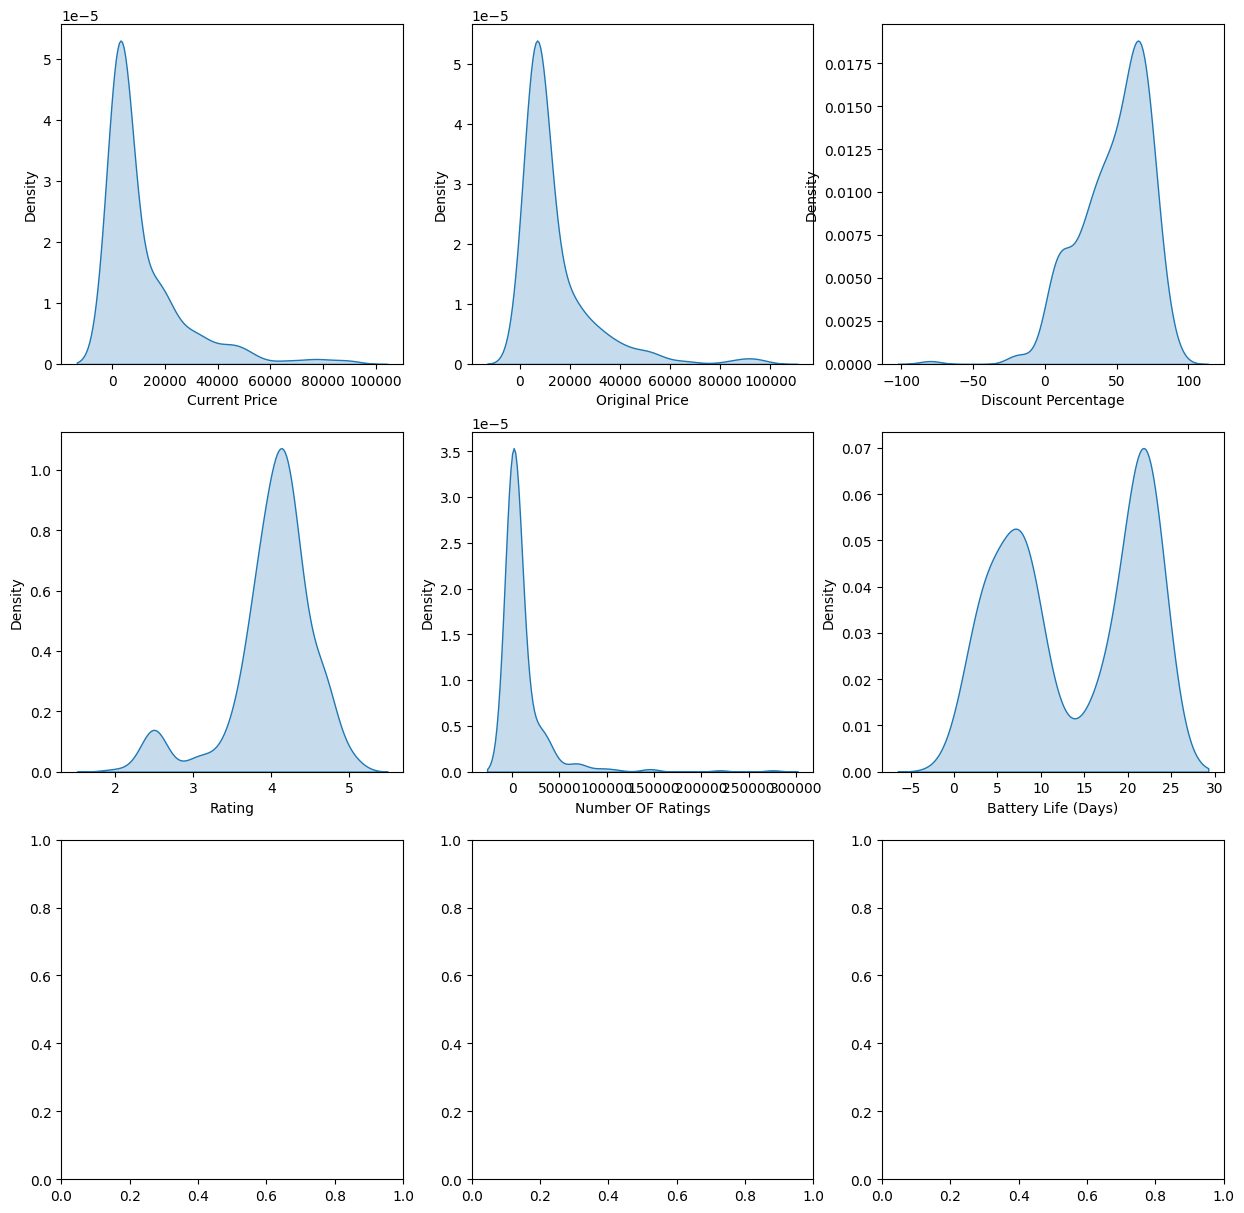

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, axex=plt.subplots(nrows=3,ncols=3,figsize=(15,15))
for i, columns in enumerate(numerical_data):
  sns.kdeplot(train_df[columns],ax=axex[i//3,i%3],fill=True)
  axex[i//3,i%3].set_xlabel(columns)

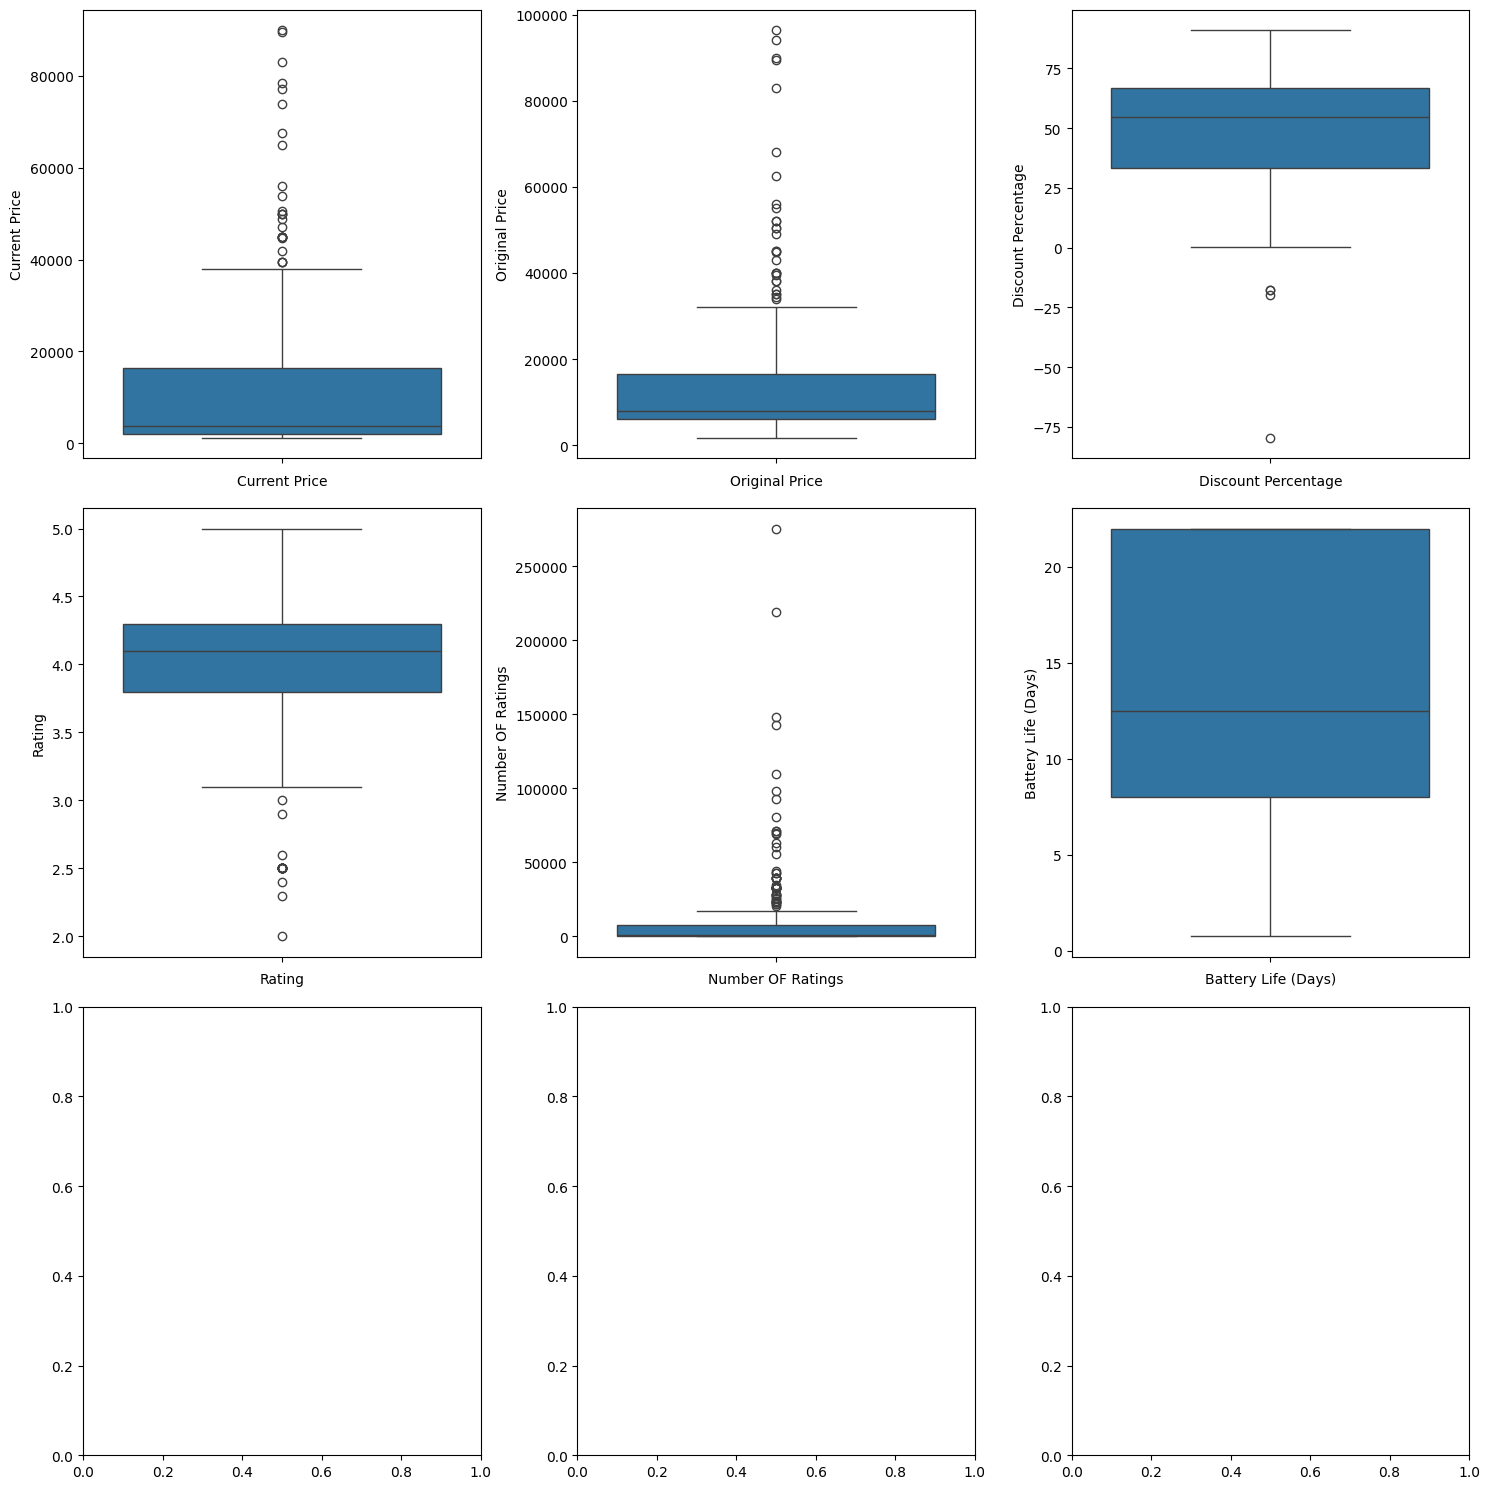

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, axex=plt.subplots(nrows=3,ncols=3,figsize=(15,15))
for i, columns in enumerate(numerical_data):
  sns.boxplot(train_df[columns],ax=axex[i//3,i%3])
  fig.tight_layout()
  axex[i//3,i%3].set_xlabel(columns)

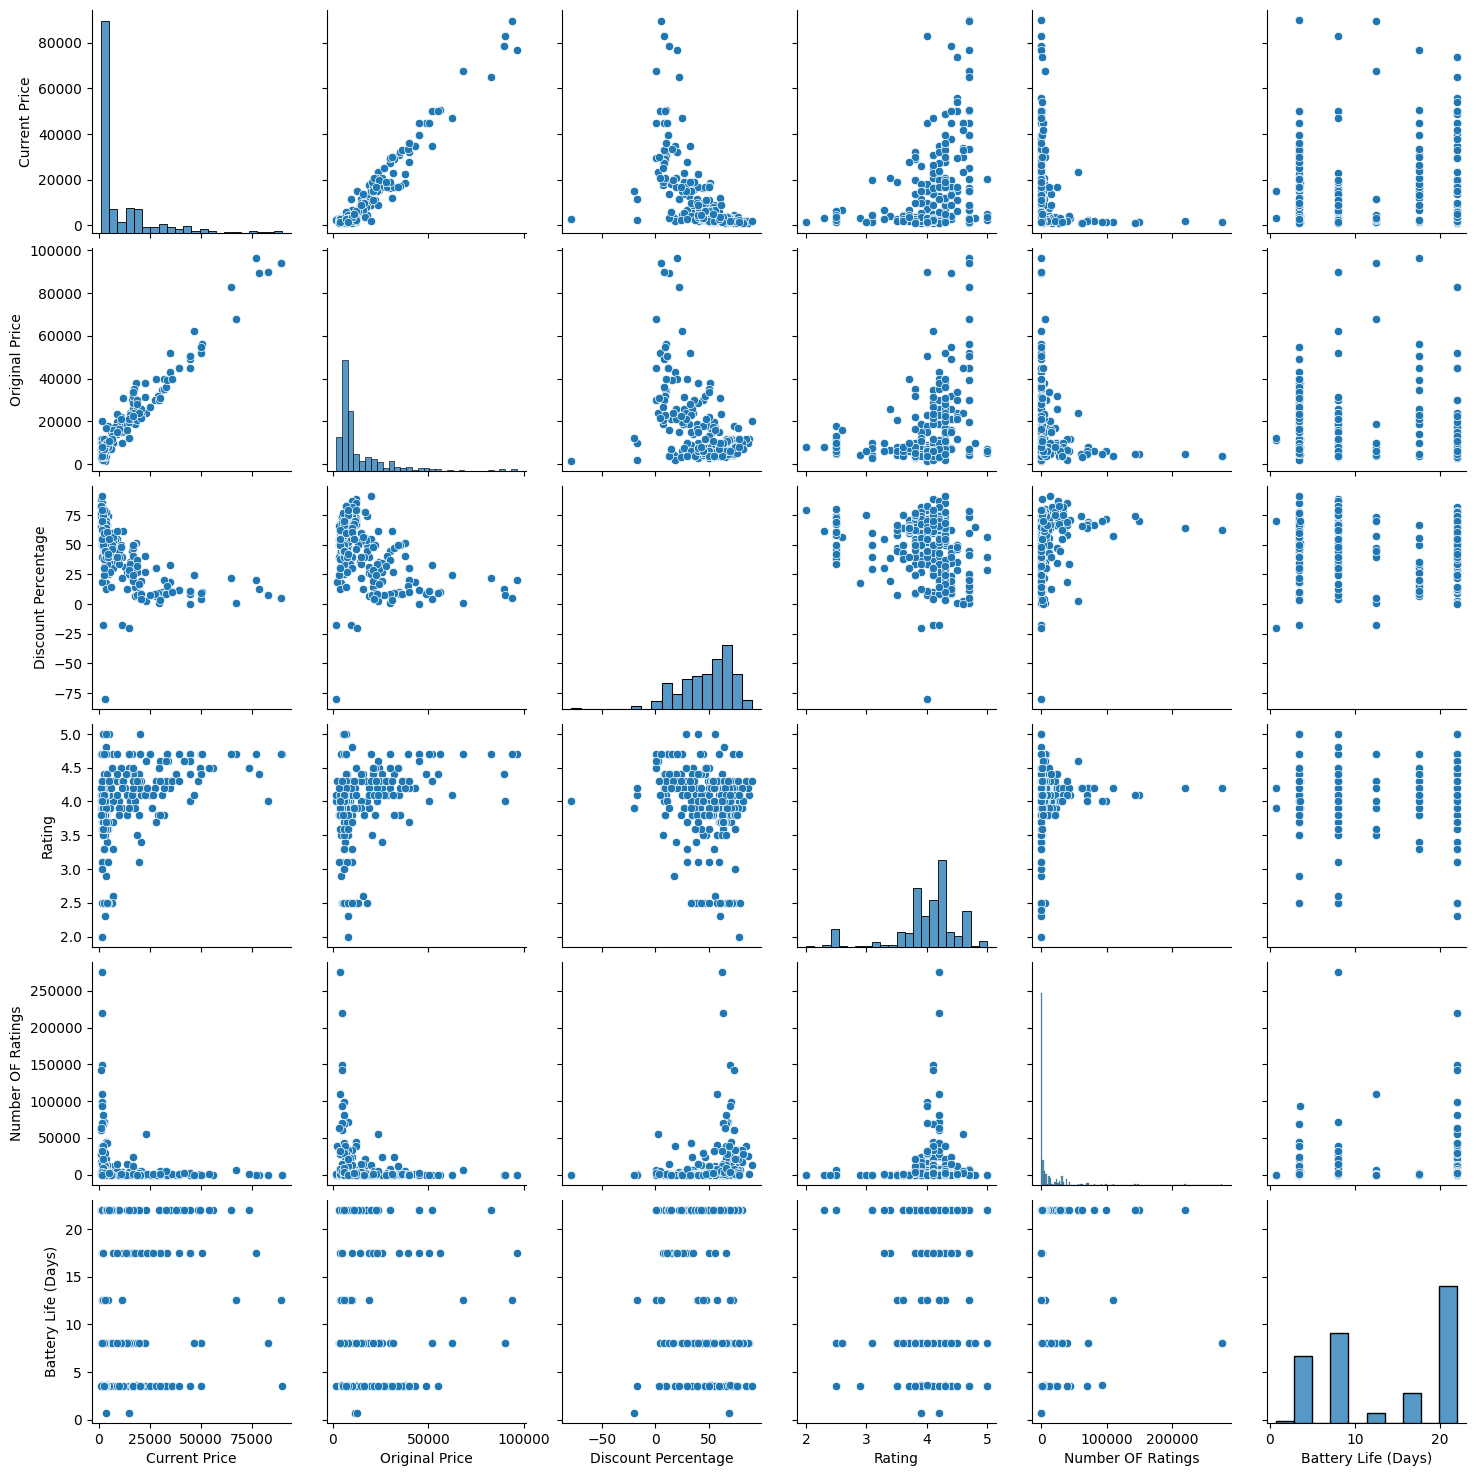

In [ ]:
sns.pairplot(train_df[numerical_data])

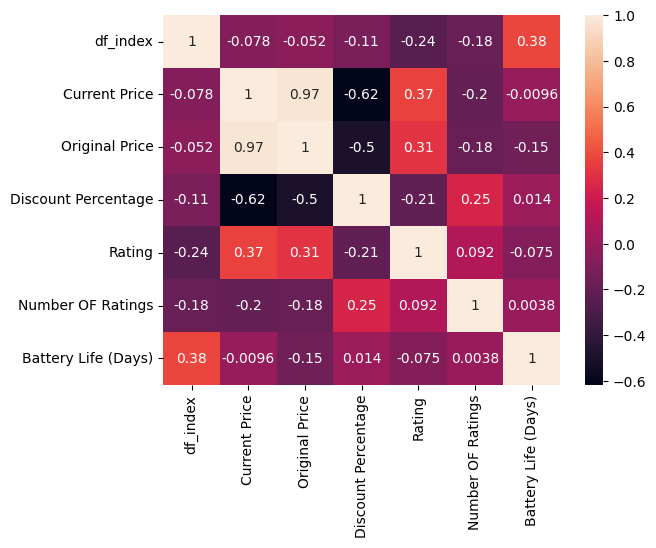

In [ ]:
# Select only numerical features for correlation analysis
numerical_features = train_df.select_dtypes(include=np.number).columns
sns.heatmap(train_df[numerical_features].corr(),annot=True)
plt.show()

In [ ]:
!pip install ydata-profiling
import ydata_profiling as yd
profile=yd.ProfileReport(train_df)
profile.to_file(output_file='output.html')
profile.to_file(output_file='output.html')

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.9/390.9 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 29.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 33.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 89.2 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=ba1cf181b5e9091fc55a04398582c3167889500457810c62930c5dc17b055d75
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
import pandas as pd
import pandas as pd
import numpy as np
df=pd.read_csv("/content/smartwatches.csv")
df.head()
df.shape
df=df.iloc[:,1:]
df.head()

,Brand,Current Price,Original Price,Discount Percentage,Rating,Number OF Ratings,Model Name,Dial Shape,Strap Color,Strap Material,Touchscreen,Battery Life (Days),Bluetooth,Display Size,Weight
0,noise,82990.0,89900.0,7.686318,4.0,65.0,Wrb-sw-colorfitpro4alpha-std-rgld_pnk,NaN,NaN,NaN,NaN,8.0,Yes,NaN,35 - 50 g
1,fire-boltt,3799.0,16999.0,77.651627,4.3,20788.0,BSW046,NaN,NaN,Silicon,Yes,3.5,Yes,1.8 inches,50 - 75 g
2,boat,1999.0,7990.0,74.981227,3.8,21724.0,Wave Call,NaN,NaN,Silicon,Yes,8.0,Yes,1.7 inches,35 - 50 g
3,fire-boltt,1799.0,19999.0,91.004550,4.3,13244.0,BSW053,NaN,NaN,Silicon,Yes,3.5,Yes,1.8 inches,75g +
4,noise,1599.0,4999.0,68.013603,4.1,13901.0,Wrb-sw-colorfitpulsegobuzz-std-blk_blk,NaN,NaN,Other,Yes,8.0,Yes,1.7 inches,35 - 50 g


In [ ]:
train_df=df.sample(frac=0.8,random_state=25)
train_df=train_df.reset_index()
train_df.info()
test_df=df.drop(train_df.index)
test_df=test_df.reset_index()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   index                360 non-null    int64  
 1   Brand                360 non-null    object 
 2   Current Price        351 non-null    float64
 3   Original Price       309 non-null    float64
 4   Discount Percentage  309 non-null    float64
 5   Rating               355 non-null    float64
 6   Number OF Ratings    312 non-null    float64
 7   Model Name           335 non-null    object 
 8   Dial Shape           257 non-null    object 
 9   Strap Color          257 non-null    object 
 10  Strap Material       304 non-null    object 
 11  Touchscreen          332 non-null    object 
 12  Battery Life (Days)  336 non-null    float64
 13  Bluetooth            355 non-null    object 
 14  Display Size         335 non-null    object 
 15  Weight               218 non-null    obj

In [ ]:
train_df['Display Size'].isna().sum()

25

In [ ]:
train_df['Display Size'].value_counts().count()

37

In [ ]:
train_df['Display Size'].fillna("0.0 inches" ,inplace=True)

In [ ]:
train_df['Display Size'].isna().sum()

0

In [ ]:
float("0.0 inches".split()[0])

0.0

In [ ]:
train_df['Display Size'].apply(lambda x:float(x.split()[0]))

,Display Size
0,0.0
1,1.7
2,1.4
3,0.0
4,1.4
...,...
355,1.7
356,1.3
357,1.8
358,1.7


In [ ]:
train_df['Weight'].value_counts()

,count
Weight,
27.5,118
75g +,53
<= 20 g,32
50 - 75 g,15


In [ ]:
import re
re.findall(r"\d+", "20 - 35 g")

['20', '35']

In [ ]:
cal=sum([int(x)for x in re.findall(r"\d+", "20 - 35 g")])/2
cal

27.5

In [ ]:
import re

# Calculate average weight for "35 - 50 g"
cal = sum([int(x) for x in re.findall(r"\d+", "20 - 35 g")]) / 2
print(f"Calculated average weight for '35 - 50 g': {cal}")

# Replace "35 - 50 g" with calculated average, avoiding chained assignment
train_df['Weight'] = train_df['Weight'].replace("20 - 35 g", cal)
# or
# train_df.loc[train_df['Weight'] == "35 - 50 g", 'Weight'] = cal

# Verify the changes by printing value counts
print(train_df['Weight'].value_counts())

Calculated average weight for '35 - 50 g': 27.5
Weight
27.5         118
75g +         53
<= 20 g       32
50 - 75 g     15
Name: count, dtype: int64


42.5

In [ ]:
import re

# Calculate average weight for "35 - 50 g"
cal = sum([int(x) for x in re.findall(r"\d+", "35 - 50 g")]) / 2
print(f"Calculated average weight for '35 - 50 g': {cal}")

# Replace "35 - 50 g" with calculated average, avoiding chained assignment
train_df['Weight'] = train_df['Weight'].replace("35 - 50 g", cal)
# or
# train_df.loc[train_df['Weight'] == "35 - 50 g", 'Weight'] = cal

# Verify the changes by printing value counts
print(train_df['Weight'].value_counts())


Calculated average weight for '35 - 50 g': 42.5
Weight
27.5         118
75g +         53
<= 20 g       32
50 - 75 g     15
Name: count, dtype: int64


In [ ]:
cal=sum([int(x)for x in re.findall(r"\d+", "50 - 75 g")])/2
cal
train_df['Weight'].replace("50 - 75 g	",cal, inplace=True)
train_df['Weight'].value_counts()

<ipython-input-28-c50bb22e997f>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Weight'].replace("50 - 75 g	",cal, inplace=True)


,count
Weight,
27.5,118
75g +,53
<= 20 g,32
50 - 75 g,15


In [ ]:
train_df['Weight'].value_counts()

,count
Weight,
27.5,118
75g +,53
<= 20 g,32
50 - 75 g,15


In [ ]:
import re

# Calculate average weight for "35 - 50 g"
cal = sum([int(x) for x in re.findall(r"\d+", "50 - 75 g")]) / 2
print(f"Calculated average weight for '35 - 50 g': {cal}")

# Replace "35 - 50 g" with calculated average, avoiding chained assignment
train_df['Weight'] = train_df['Weight'].replace("50 - 75 g", cal)
# or
# train_df.loc[train_df['Weight'] == "35 - 50 g", 'Weight'] = cal

# Verify the changes by printing value counts
print(train_df['Weight'].value_counts())

Calculated average weight for '35 - 50 g': 62.5
Weight
27.5       118
75g +       53
<= 20 g     32
62.5        15
Name: count, dtype: int64


In [ ]:
import re
train_df['Weight'].replace("75g +",re.findall("\d+","75g +")[0], inplace=True)

<ipython-input-46-c6937b314e78>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Weight'].replace("75g +",re.findall("\d+","75g +")[0], inplace=True)


In [ ]:
import re
train_df['Weight'].replace("<= 20 g",re.findall("\d+","<= 20 g")[0], inplace=True)

<ipython-input-49-13c527cd15b1>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Weight'].replace("<= 20 g",re.findall("\d+","<= 20 g")[0], inplace=True)


In [ ]:
train_df["Weight"].value_counts()

,count
Weight,
27.5,118
75,53
20,32
62.5,15


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   index                360 non-null    int64  
 1   Brand                360 non-null    object 
 2   Current Price        351 non-null    float64
 3   Original Price       309 non-null    float64
 4   Discount Percentage  309 non-null    float64
 5   Rating               355 non-null    float64
 6   Number OF Ratings    312 non-null    float64
 7   Model Name           335 non-null    object 
 8   Dial Shape           257 non-null    object 
 9   Strap Color          257 non-null    object 
 10  Strap Material       304 non-null    object 
 11  Touchscreen          332 non-null    object 
 12  Battery Life (Days)  336 non-null    float64
 13  Bluetooth            355 non-null    object 
 14  Display Size         360 non-null    object 
 15  Weight               218 non-null    obj

In [ ]:
train_df["discount price"] = (train_df["Original Price"]*train_df["Discount Percentage"])/100

In [ ]:
train_df.drop(["Discount Percentage"],axis=1,inplace=True)

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   index                360 non-null    int64  
 1   Brand                360 non-null    object 
 2   Current Price        351 non-null    float64
 3   Original Price       309 non-null    float64
 4   Rating               355 non-null    float64
 5   Number OF Ratings    312 non-null    float64
 6   Model Name           335 non-null    object 
 7   Dial Shape           257 non-null    object 
 8   Strap Color          257 non-null    object 
 9   Strap Material       304 non-null    object 
 10  Touchscreen          332 non-null    object 
 11  Battery Life (Days)  336 non-null    float64
 12  Bluetooth            355 non-null    object 
 13  Display Size         360 non-null    object 
 14  Weight               218 non-null    object 
 15  discount price       309 non-null    flo

In [ ]:
numerical_data = [feature for feature in train_df.columns if train_df[feature].dtypes != "object"]
numerical_data

['index',
 'Current Price',
 'Original Price',
 'Rating',
 'Number OF Ratings',
 'Battery Life (Days)',
 'discount price']

In [ ]:
train_df[numerical_data].head()

,index,Current Price,Original Price,Rating,Number OF Ratings,Battery Life (Days),discount price
0,61,78490.0,89460.0,4.4,6.0,NaN,10969.999999
1,77,1599.0,5999.0,4.3,37.0,12.5,4400.000000
2,238,7499.0,16999.0,4.3,11520.0,8.0,9500.000000
3,23,2499.0,7990.0,4.2,71481.0,8.0,5491.000000
4,186,17999.0,20999.0,4.4,1111.0,17.5,3000.000000


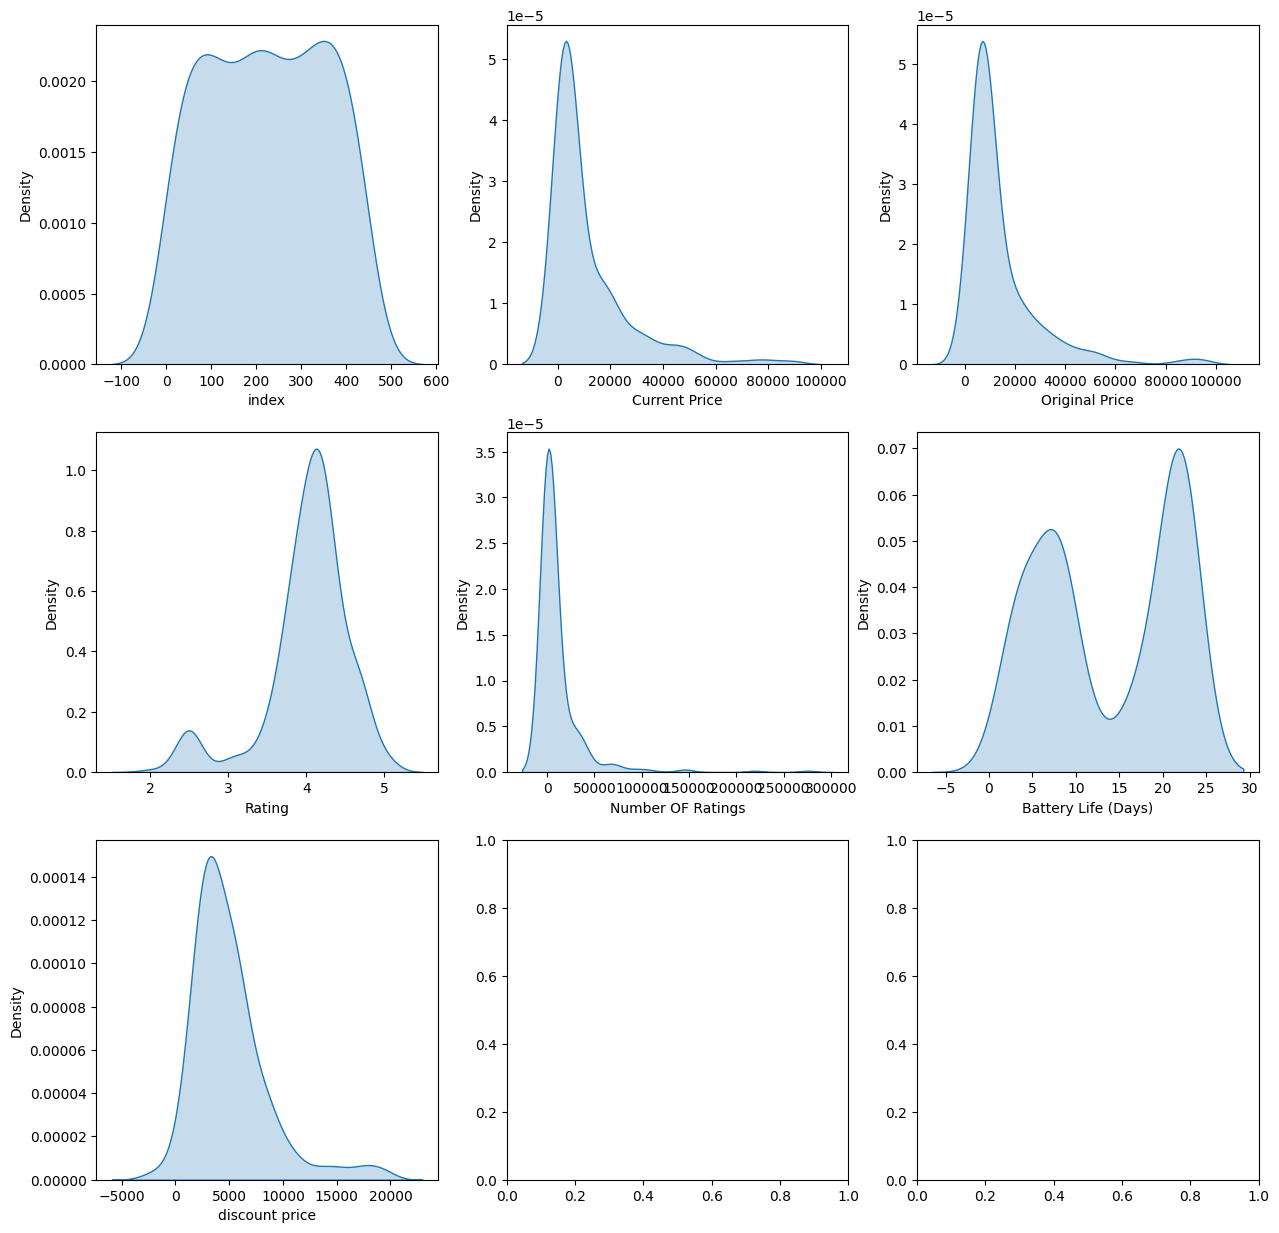

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, axex=plt.subplots(nrows=3,ncols=3,figsize=(15,15))
for i, columns in enumerate(numerical_data):
  sns.kdeplot(train_df[columns],ax=axex[i//3,i%3],fill=True)
  axex[i//3,i%3].set_xlabel(columns)

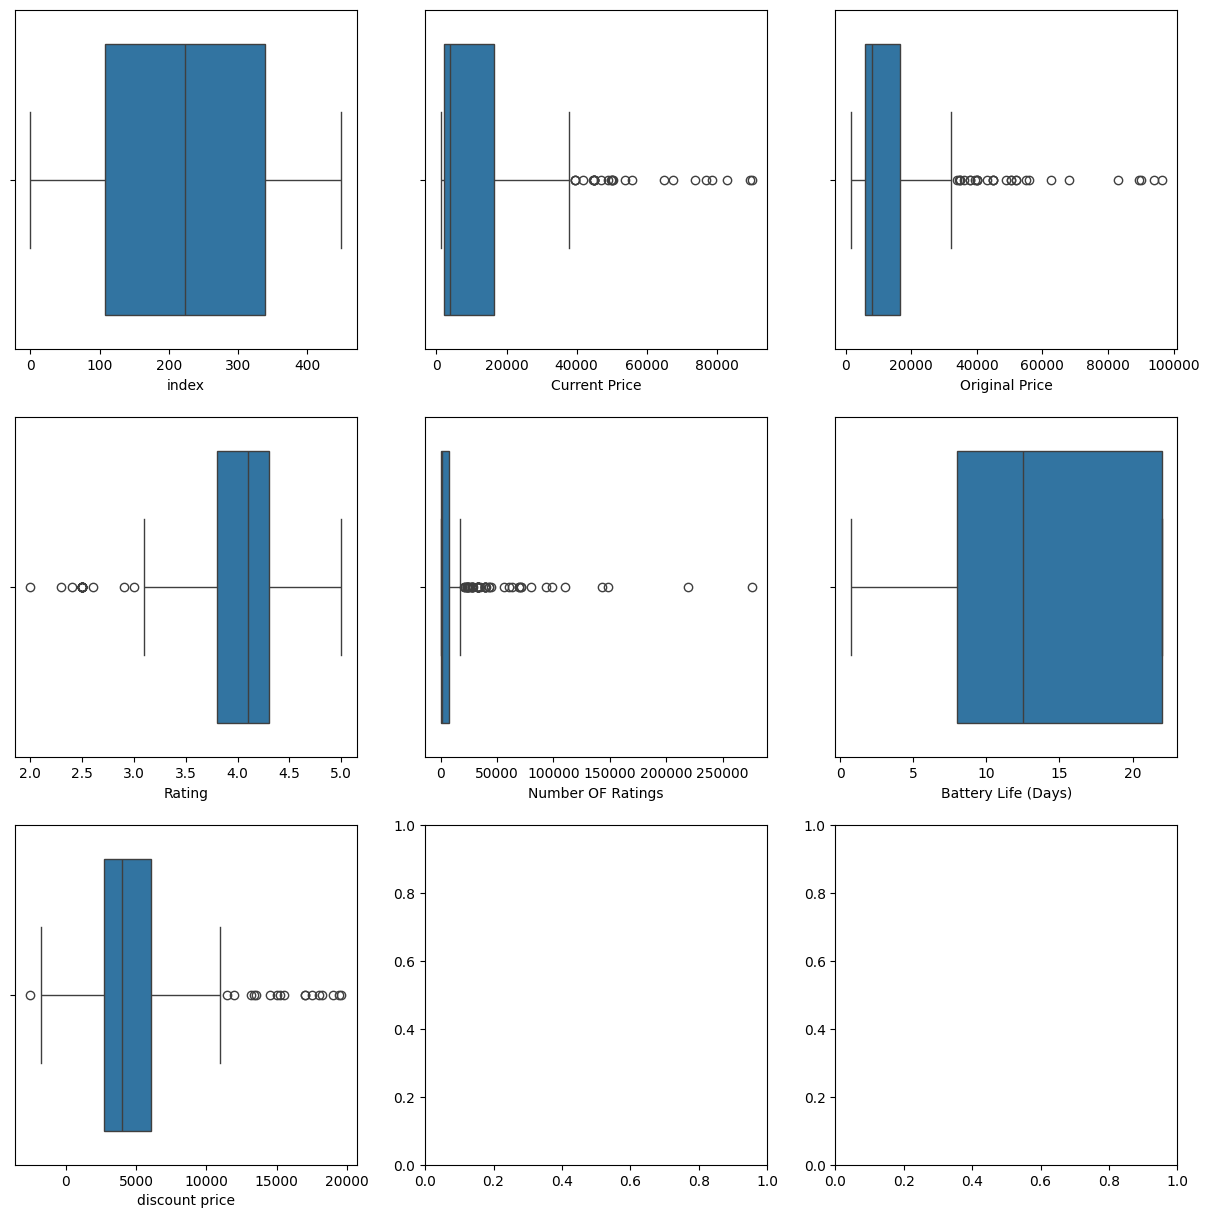

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, axex=plt.subplots(nrows=3,ncols=3,figsize=(15,15))
for i, columns in enumerate(numerical_data):
  sns.boxplot(x=train_df[columns],ax=axex[i//3,i%3])
  axex[i//3,i%3].set_xlabel(columns)

In [ ]:
def remove_outliers(df, column_name):
    q1 = df[column_name].quantile(0.25)
    q3 = df[column_name].quantile(0.75)
    IQR = q3 - q1
    not_outliers = df[~((df[column_name] < (q1 - 1.5 * IQR)) | (df[column_name] > (q3 + 1.5 * IQR)))]
    outliers_dropped = not_outliers.dropna().reset_index()
    return outliers_dropped


In [ ]:
train_df.columns

Index(['index', 'Brand', 'Current Price', 'Original Price', 'Rating',
       'Number OF Ratings', 'Model Name', 'Dial Shape', 'Strap Color',
       'Strap Material', 'Touchscreen', 'Battery Life (Days)', 'Bluetooth',
       'Display Size', 'Weight', 'discount price'],
      dtype='object')

In [ ]:
import_col=['Current Price', 'Original Price', 'Rating','Number OF Ratings','Display Size']

In [ ]:
def remove_outliers(df, column_name):
    # Convert 'Display Size' to numerical before quantile calculation
    if column_name == 'Display Size':
        df['Display Size'] = df['Display Size'].apply(lambda x: float(x.split()[0]) if isinstance(x, str) else x)

    q1 = df[column_name].quantile(0.25)
    q3 = df[column_name].quantile(0.75)
    IQR = q3 - q1
    not_outliers = df[~((df[column_name] < (q1 - 1.5 * IQR)) | (df[column_name] > (q3 + 1.5 * IQR)))]
    outliers_dropped = not_outliers.dropna()
    return outliers_dropped

for col in import_col:
    train_df = remove_outliers(train_df, col)

train_df = train_df.reset_index(drop=True)

In [ ]:
for col in numerical_data:
  print(col)
train_df[col].fillna(train_df[col].median(),inplace=True)

index
Current Price
Original Price
Rating
Number OF Ratings
Battery Life (Days)
discount price


<ipython-input-82-2968dc0f0e29>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df[col].fillna(train_df[col].median(),inplace=True)


In [ ]:
train_df.shape

(49, 17)

In [ ]:
train_df[numerical_data].isna().sum()

,0
index,0
Current Price,0
Original Price,0
Rating,0
Number OF Ratings,0
Battery Life (Days),0
discount price,0


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
data=scaler.fit_transform(train_df[numerical_data[:-1]])

In [ ]:
data

array([[0.24150943, 0.47826087, 0.35423309, 0.875     , 0.27673428,
        0.75675676],
       [0.93207547, 0.07246377, 0.12502344, 0.25      , 0.16804408,
        1.        ],
       [0.97358491, 0.04550725, 0.02083724, 0.375     , 0.34184823,
        1.        ],
       [0.34339623, 0.85481159, 0.63534829, 0.5       , 0.49436514,
        0.75675676],
       [0.44150943, 0.08695652, 0.04167448, 0.5       , 0.08189331,
        0.24324324],
       [0.28301887, 0.97095652, 0.81265237, 0.625     , 0.14049587,
        0.        ],
       [0.94339623, 0.        , 0.01041862, 0.125     , 0.33358377,
        0.75675676],
       [0.45660377, 0.36231884, 0.3125586 , 0.5       , 0.07513148,
        0.24324324],
       [0.32075472, 0.44927536, 0.51032485, 0.5       , 0.49436514,
        0.        ],
       [0.23396226, 0.33333333, 0.3125586 , 0.625     , 0.01953418,
        0.24324324],
       [0.46415094, 0.50724638, 0.45841929, 0.625     , 0.02729777,
        0.24324324],
       [0.76603774, 0

In [ ]:
data = pd.DataFrame(data, columns=numerical_data[:-1])
data.head()

,index,Current Price,Original Price,Rating,Number OF Ratings,Battery Life (Days)
0,0.241509,0.478261,0.354233,0.875,0.276734,0.756757
1,0.932075,0.072464,0.125023,0.250,0.168044,1.000000
2,0.973585,0.045507,0.020837,0.375,0.341848,1.000000
3,0.343396,0.854812,0.635348,0.500,0.494365,0.756757
4,0.441509,0.086957,0.041674,0.500,0.081893,0.243243


In [ ]:
data.shape

(49, 6)

In [ ]:
# Ensure 'index' is not in the list of columns to drop if it's the index
numerical_data_to_drop = [col for col in numerical_data[:-1] if col in train_df.columns and col != train_df.index.name]

# Drop the specified columns from train_df
train_df.drop(columns=numerical_data_to_drop, inplace=True)

In [ ]:
train_df.head()

,level_0,Brand,Model Name,Dial Shape,Strap Color,Strap Material,Touchscreen,Bluetooth,Display Size,Weight,discount price
0,4,honor,Watch GS Pro,Circle,Blue,Nylon,Yes,Yes,1.4,27.5,3000.000000
1,9,pebble,"Cosmos Grande 2.1 Largest Display, BT Calling,...",Rectangle,Blue,Silicon,Yes,Yes,2.1,27.5,6000.000000
2,16,pebble,Pace Unisex Smart Watch with Full Touch Dynami...,Rectangle,Black,Silicon,Yes,Yes,1.4,27.5,1930.000000
3,28,samsung,Galaxy Watch Active 2 Steel LTE,Circle,Brown,Silicon,Yes,Yes,1.4,27.5,3500.000001
4,34,amazfit,Bip 3 Pro with 1.69 inch Large Color Display B...,Square,Beige,Silicon,Yes,Yes,1.7,20,1500.000000


In [ ]:
train_df=pd.concat([train_df,data],axis=1)
train_df.head()

,level_0,Brand,Model Name,Dial Shape,Strap Color,Strap Material,Touchscreen,Bluetooth,Display Size,Weight,...,Original Price,Rating,Number OF Ratings,Battery Life (Days),index,Current Price,Original Price,Rating,Number OF Ratings,Battery Life (Days)
0,4,honor,Watch GS Pro,Circle,Blue,Nylon,Yes,Yes,1.4,27.5,...,0.354233,0.875,0.276734,0.756757,0.241509,0.478261,0.354233,0.875,0.276734,0.756757
1,9,pebble,"Cosmos Grande 2.1 Largest Display, BT Calling,...",Rectangle,Blue,Silicon,Yes,Yes,2.1,27.5,...,0.125023,0.250,0.168044,1.000000,0.932075,0.072464,0.125023,0.250,0.168044,1.000000
2,16,pebble,Pace Unisex Smart Watch with Full Touch Dynami...,Rectangle,Black,Silicon,Yes,Yes,1.4,27.5,...,0.020837,0.375,0.341848,1.000000,0.973585,0.045507,0.020837,0.375,0.341848,1.000000
3,28,samsung,Galaxy Watch Active 2 Steel LTE,Circle,Brown,Silicon,Yes,Yes,1.4,27.5,...,0.635348,0.500,0.494365,0.756757,0.343396,0.854812,0.635348,0.500,0.494365,0.756757
4,34,amazfit,Bip 3 Pro with 1.69 inch Large Color Display B...,Square,Beige,Silicon,Yes,Yes,1.7,20,...,0.041674,0.500,0.081893,0.243243,0.441509,0.086957,0.041674,0.500,0.081893,0.243243
